In [17]:
#priyanshu jha
import pandas as pd
import numpy as np
import statistics as st 
from sklearn.metrics.pairwise import cosine_similarity 
import matplotlib.pyplot as plt 
from sklearn.metrics import  jaccard_score, pairwise_distances
import seaborn as sns
print("Library import successfull")

Library import successfull


In [18]:
# A1 Loading the data into data frame
df1 = pd.read_excel("Lab02.xlsx" , sheet_name="thyroid0387_UCI")
print(df1.head())
print(df1.shape)


   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            f   ?   
1            t  128   

In [19]:
# Identifying the data type of each attribute
print(df1.dtypes)

Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                

In [20]:
# Finding the numeric range of attributes which has numeric data
df1.describe()

,Record ID,age
count,1.000000e+03,1000.000000
mean,8.409340e+08,51.509000
std,7.628734e+04,18.776541
min,8.408010e+08,1.000000
25%,8.409031e+08,35.000000
50%,8.409210e+08,55.000000
75%,8.410111e+08,67.000000
max,8.410310e+08,97.000000


In [21]:
# Checking for the missing values in each attribute
temp = df1.isnull().sum()
print(temp)
print("Attribute with missing values: ",temp[temp>0])

Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype: int64
Attribute with missing val

In [22]:
# Replacing ? with NaN value
df1.replace(['?',' '],np.nan,inplace=True)

In [23]:
# Attributes with number of missing values
df1.isnull().sum()

Record ID                      0
age                            0
sex                           24
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          115
T3 measured                    0
T3                           202
TT4 measured                   0
TT4                           40
T4U measured                   0
T4U                           98
FTI measured                   0
FTI                           98
TBG measured                   0
TBG                          964
referral source                0
Condition 

In [24]:
# Dropping the index with missing values
df1.dropna()

#  Filling the missing indices with mean value of that attribute
df1.fillna(df1['TSH'].mean(),inplace=True)
df1.fillna(df1['T3'].mean(),inplace=True)
df1.fillna(df1['TT4'].mean(),inplace=True)
df1.fillna(df1['T4U'].mean(),inplace=True)
df1.fillna(df1['TBG'].mean(),inplace=True)

# Converting numeric data into integer
df1['TSH'] = df1['TSH'].astype(int)
df1['T3'] = df1['T3'].astype(int)
df1['TT4'] = df1['TT4'].astype(int)
df1['T4U'] = df1['T4U'].astype(int)
df1['TBG'] = df1['TBG'].astype(int)
print(df1.shape)



(1000, 31)


In [25]:
print(df1.head())

   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured       FTI TBG measured TBG  \
0            f    6            f   6            f  6.559638            f   6   
1         

In [26]:
# df1.dtypes
numeric = ['age','TSH','T3','TT4','T4U','FTI','TBG']
#  Calculating mean of numeric data
record_mean = st.mean(df1['Record ID'])
age_mean = st.mean(df1['age'])
TSH_mean = st.mean(df1['TSH'])
T3_mean = st.mean(df1['T3'])
TT4_mean = st.mean(df1['TT4'])
T4U_mean = st.mean(df1['T4U'])
FTI_mean = st.mean(df1['FTI'])
TBG_mean = st.mean(df1['TBG'])

# Calculating variance of numeric data
age_var = df1['age'].var()
TSH_var = df1['TSH'].var()
T3_var = df1['T3'].var()
TT4_var = df1['TT4'].var()
T4U_var = df1['T4U'].var()
FTI_var = df1['FTI'].var()
TBG_var = df1['TBG'].var()
# # print(record_mean)
table = pd.DataFrame({'Mean':[age_mean,TSH_mean,T3_mean,TT4_mean,T4U_mean,FTI_mean,TBG_mean],'Varince':[age_var,TSH_var,T3_var,TT4_var,T4U_var,FTI_var,TBG_var]},
index=['age','TSH','T3','TT4','T4U','FTI','TBG'])
print(table)




           Mean      Varince
age   51.509000   352.558477
TSH    6.210000   768.544444
T3     2.309000     4.035555
TT4  102.427000  2057.866538
T4U    0.947000     2.993184
FTI  104.012845  4490.172286
TBG    6.728000    16.500517


In [27]:
'''A2. Data Imputation: employ appropriate central tendencies to fill the missing values in the data 
variables. Employ following guidance.
• Mean may be used when the attribute is numeric with no outliers
• Median may be employed for attributes which are numeric and contain outliers
• Mode may be employed for categorical attributes'''
# This question is done while studying the presence of missing values in each attribute



'A2. Data Imputation: employ appropriate central tendencies to fill the missing values in the data \nvariables. Employ following guidance.\n• Mean may be used when the attribute is numeric with no outliers\n• Median may be employed for attributes which are numeric and contain outliers\n• Mode may be employed for categorical attributes'

In [28]:
'''
A3. Data Normalization / Scaling: from the data study, identify the attributes which may need 
normalization. Employ appropriate normalization techniques to create normalized set of data.
'''
from sklearn.preprocessing import StandardScaler
# Attributes that require normalization
norm_attr  = ['TT4','T4U']
scaler = StandardScaler()
df1[norm_attr] = scaler.fit_transform(df1[norm_attr])
df1.shape

(1000, 31)

In [29]:
print(df1.head())

   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured       TT4 T4U measured       T4U FTI measured       FTI  \
0            f -2.126705            f  2.922132            f  6.559638   
1            t  0.5640

In [30]:
'''A4. Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the 
attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate 
the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors. 
Use first vector for each document for this. Compare the values for JC and SMC and judge the 
appropriateness of each of them.
JC = (f11) / (f01+ f10+ f11)
SMC = (f11 + f00) / (f00 + f01 + f10 + f11)
f11= number of attributes where the attribute carries value of 1 in both 
the vectors.'''
# Vectors which we are going to consider 
vect1 = df1['sex']
vect2 = df1['T3 measured']

# sex has binary attributes of F and M
# T3 measured has binary attributes of t and f
# consider F = 0, M = 1, and t = 0, f = 1
f01 = 0
f11 = 0
f10 = 0
f00 = 0

for i in range(len(vect1)):
    if vect1[i] == 'F' and vect2[i] == 'f':
        f01 += 1
    elif vect1[i] == 'M' and vect2[i] == 'f':
        f11 += 1
    elif vect1[i] == 'M' and vect2[i] == 't':
        f10 += 1
    elif vect1[i] == 'F' and vect2[i] == 't':
        f00 += 1

# Jaccard Coefficiet
JC = f11/(f01+f10+f11)

# Simple Matching Coefficient
SMC = (f11 + f00)/(f00 + f01 + f10 + f11)

print("Jaccard Coefficient: ",JC)
print("Simple Matching Coefficient: ",SMC)

    

Jaccard Coefficient:  0.0982532751091703
Simple Matching Coefficient:  0.576844262295082


In [31]:
'''A4. Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the 
attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate 
the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors. 
Use first vector for each document for this. Compare the values for JC and SMC and judge the 
appropriateness of each of them.
JC = (f11) / (f01+ f10+ f11)
SMC = (f11 + f00) / (f00 + f01 + f10 + f11)
f11= number of attributes where the attribute carries value of 1 in both 
the vectors.''' 

# Taking any two numeric vectors
age_vect = df1['age'].values
TBG_vect = df1['TBG'].values

age_vect = age_vect.reshape(1,-1)
TBG_vect = TBG_vect.reshape(1, -1)
cosine_similarity_score  = cosine_similarity(age_vect,TBG_vect)

print("cosine_similarity: ",cosine_similarity_score[0][0])



cosine_similarity:  0.7931029334705666


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\pairwise.py:2181: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


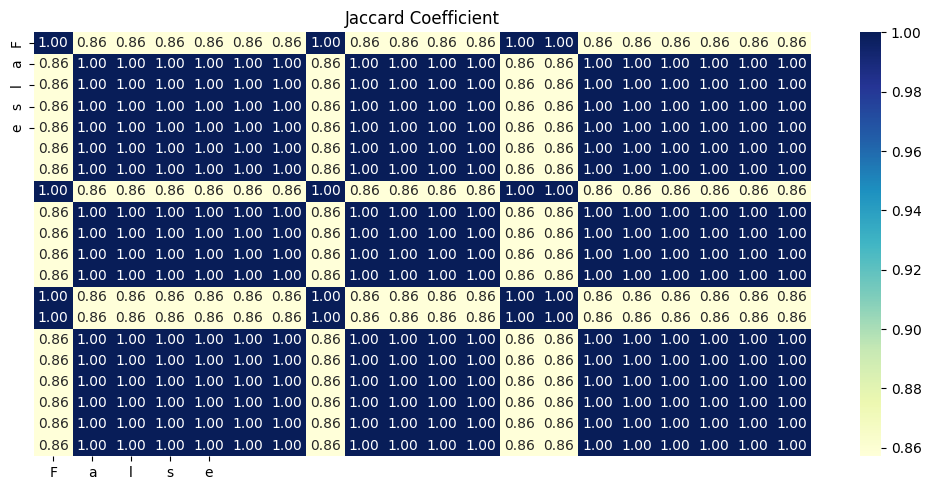

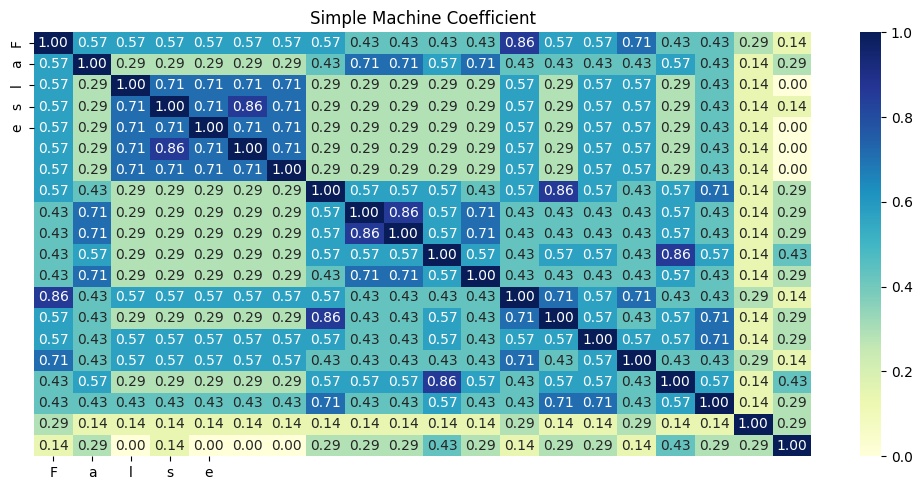

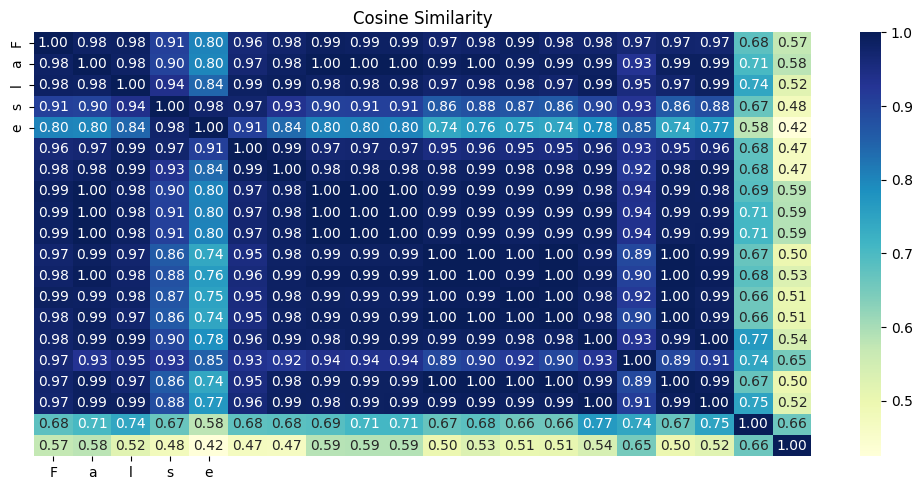

In [32]:
'''A6. Heatmap plot: Consider the first 20 observation vectors. Calculate the JC, SMC and COS between the 
pair of vectors for these 20 vectors. Employ similar strategies for coefficient calculation as in A4 & A5.
Employ a heatmap plot to visualize the similarities''' 

# All the numeric attributes we have
numeric_attr = ['age','TSH','T3','TT4','T4U','FTI','TBG']
new_vector = df1[numeric_attr].iloc[:20]

new_vector = np.array(new_vector)
# Calculate JC, MCM and COS between all pairs of vectors
jc_similarity = 1 - pairwise_distances(new_vector, metric='jaccard')

smc_similarity = 1 - pairwise_distances(new_vector, metric='hamming')

cosine_similarity = 1 - pairwise_distances(new_vector, metric='cosine')

# Creating heatmap
plt.figure(figsize=(30,5))

plt.subplot(131)
sns.heatmap(jc_similarity, annot=True, cmap='YlGnBu', fmt='.2f', xticklabels='False', yticklabels='False')
plt.title("Jaccard Coefficient")
plt.tight_layout()
plt.show()

plt.figure(figsize=(30,5))
plt.subplot(131)
sns.heatmap(smc_similarity, annot=True, cmap='YlGnBu', fmt='.2f', xticklabels='False', yticklabels='False')
plt.title("Simple Machine Coefficient")
plt.tight_layout()
plt.show()

plt.figure(figsize=(30,5))
plt.subplot(131)
sns.heatmap(cosine_similarity, annot=True, cmap='YlGnBu', fmt='.2f', xticklabels='False', yticklabels='False')
plt.title("Cosine Similarity")

plt.tight_layout()
plt.show()
